In [1]:
from classes.basic_optical_gating import BasicOpticalGating as BOG, BasicOpticalGatingPlotter as BOGP, Logger
from classes.drawer import Drawer

In [2]:
v = Drawer(30, 39.1, (256, 256))
v.generate_reference_sequence()
v.generate_sequence()

In [3]:
#sequence_src = "D:/Data/both 800fps/brightfield/*tif"
#reference_sequence_src = "D:/Data/both 800fps/ref_seq.tif"
sequence_src = "D:/Data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/brightfield/*tif"
reference_sequence_src = "D:/Data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/ref_seq.tif"
reference_sequence_period_src = 3.577851226661945105e+01

og = BOG()
og.logger.set_quiet()
og.set_sequence(sequence_src)
og.set_reference_sequence(reference_sequence_src)
og.set_reference_period(reference_sequence_period_src)
og.run(bias_correct=True, drift_correct=False)


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import tifffile as tf

In [5]:
sequence = v.sequence.astype(np.int32)
reference_sequence = v.reference_sequence.astype(np.int64)

In [18]:
og = BOG()
og.logger.set_quiet()
og.set_sequence(v.sequence)
og.set_reference_sequence(v.reference_sequence)
og.set_reference_period(v.reference_period)
og.run(bias_correct=True, drift_correct=False)

In [19]:
#sequence = og.sequence.astype(np.int32)
#reference_sequence = og.reference_sequence.astype(np.int64)

In [20]:
#sequence = tf.imread("D:/Data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/brightfield/*tif").astype(np.int16)
#reference_sequence = tf.imread("D:/Data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/ref_seq.tif").astype(np.int16)

In [21]:
ssds = []
for f in range(sequence.shape[0]):
    ssd = []
    for r in range(reference_sequence.shape[0]):
        ssd.append(np.sum((sequence[f] - reference_sequence[r])**2))
    ssds.append(ssd)

sads = []
for f in range(sequence.shape[0]):
    sad = []
    for r in range(reference_sequence.shape[0]):
        sad.append(np.sum(np.abs(sequence[f] - reference_sequence[r])))
    sads.append(sad)

ssds = np.array(ssds)
sads = np.array(sads)

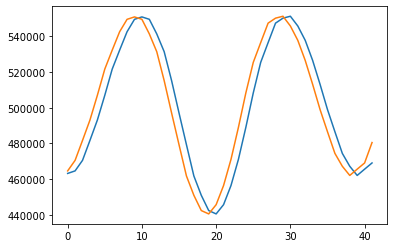

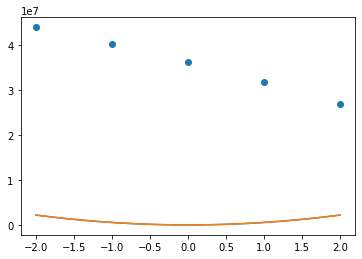

In [22]:
bc_I_1 = []
bc_I_2 = []
bc_I_3 = []

for i in range(1, reference_sequence.shape[0] - 1):
    y_1 = reference_sequence[i - 1]
    y_2 = reference_sequence[i]
    y_3 = reference_sequence[i + 1]

    bc_I_1.append(np.sum((y_1 - y_2)**2))
    bc_I_2.append(np.sum((y_2 - y_3)**2))
    bc_I_3.append(np.sum((y_1 - y_3)**2))

plt.plot(bc_I_1)
plt.plot(bc_I_2)
plt.show()

frame = 10
xs = np.linspace(-2, 2, 100)
#plt.plot(xs, bc_I_1[frame - 1] * (xs - 0))
#plt.plot(xs, -bc_I_2[frame - 1] * (xs - 0))
plt.plot(xs, (bc_I_1[frame - 1] * (xs - 0)**2))
plt.plot(xs, (bc_I_2[frame - 1] * (xs - 0)**2))
xs = np.linspace(-2, 2, 5)
plt.scatter(xs, ssds[frame][0:5])

(1171,)
(1173,)


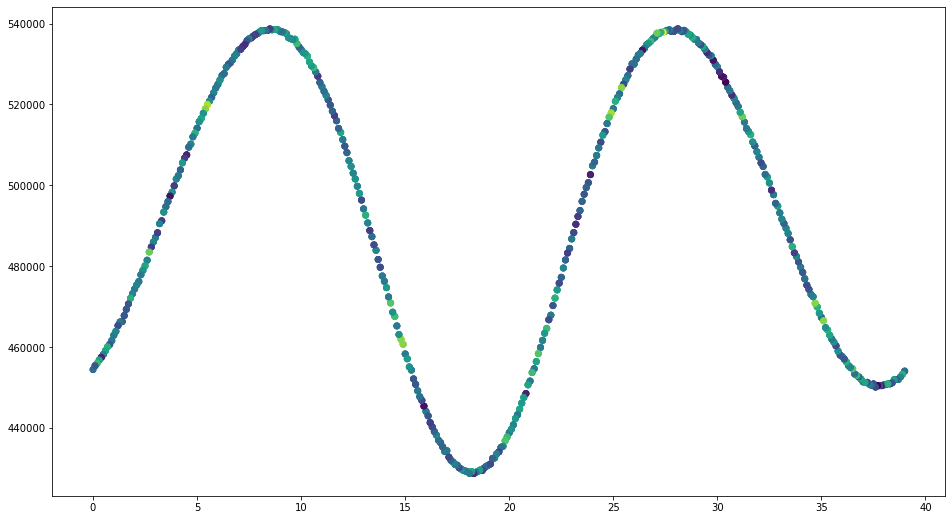

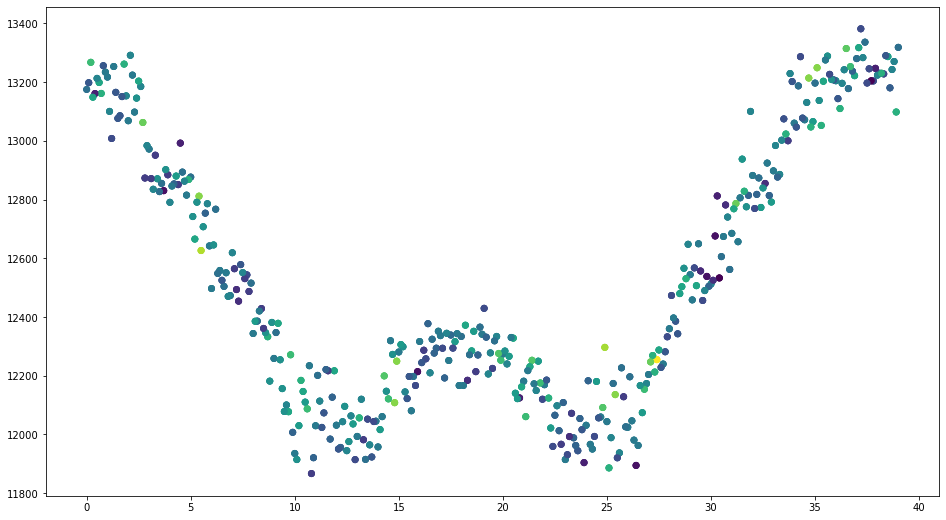

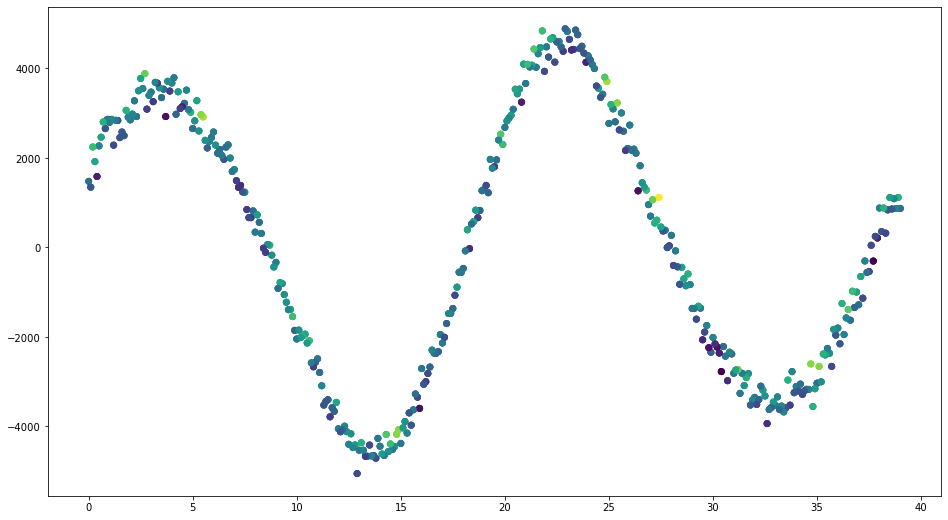

In [23]:
bc_I_1_squared = []
bc_I_2_squared = []
bc_I_1_times_I_2 = []

# Get our ssd bias correction
for i in range(1, sequence.shape[0] - 1):
    y_1 = sequence[i - 1]
    y_2 = sequence[i]
    y_3 = sequence[i + 1]

    I_0 = y_2
    I_2 = (y_1 + y_3 - 2 * y_2) / 2
    I_1 = y_3 - I_2 - I_0

    I_1_squared = np.sum(I_1**2)
    I_2_squared = np.sum(I_2**2)
    I_1_times_I_2 = np.sum(I_1 * I_2)

    bc_I_1_squared.append(I_1_squared)
    bc_I_2_squared.append(I_2_squared)
    bc_I_1_times_I_2.append(I_1_times_I_2)

bc_I_1_squared = np.array(bc_I_1_squared)
bc_I_2_squared = np.array(bc_I_2_squared)
bc_I_1_times_I_2 = np.array(bc_I_1_times_I_2)

print(bc_I_1_squared.shape)
print(og.phases.shape)
plt.figure(figsize = (16,9))
plt.scatter(og.phases[1:-1], bc_I_1_squared, c = og.delta_phases[1::])
plt.show()

plt.figure(figsize = (16,9))
plt.scatter(og.phases[1:-1], bc_I_2_squared, c = og.delta_phases[1::])
plt.show()

plt.figure(figsize = (16,9))
plt.scatter(og.phases[1:-1], bc_I_1_times_I_2, c = og.delta_phases[1::])
plt.show()
    

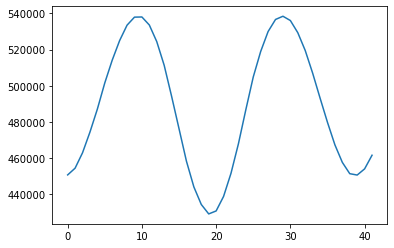

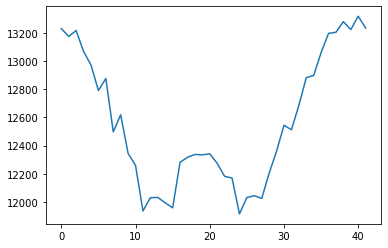

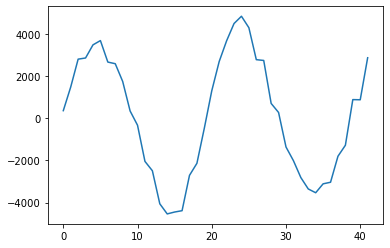

In [24]:
bc_I_1_squared = []
bc_I_2_squared = []
bc_I_1_times_I_2 = []

# Get our ssd bias correction
for i in range(1, reference_sequence.shape[0] - 1):
    y_1 = reference_sequence[i - 1]
    y_2 = reference_sequence[i]
    y_3 = reference_sequence[i + 1]

    I_0 = y_2
    I_2 = (y_1 + y_3 - 2 * y_2) / 2
    I_1 = y_3 - I_2 - I_0

    I_1_squared = np.sum(I_1**2)
    I_2_squared = np.sum(I_2**2)
    I_1_times_I_2 = np.sum(I_1 * I_2)

    bc_I_1_squared.append(I_1_squared)
    bc_I_2_squared.append(I_2_squared)
    bc_I_1_times_I_2.append(I_1_times_I_2)

bc_I_1_squared = np.array(bc_I_1_squared)
bc_I_2_squared = np.array(bc_I_2_squared)
bc_I_1_times_I_2 = np.array(bc_I_1_times_I_2)

plt.plot(bc_I_1_squared)
plt.show()

plt.plot(bc_I_2_squared)
plt.show()

plt.plot(bc_I_1_times_I_2)
plt.show()
    

32


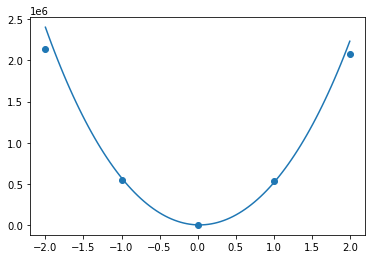

33


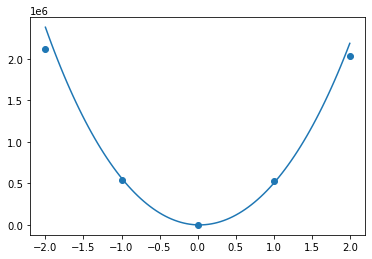

34


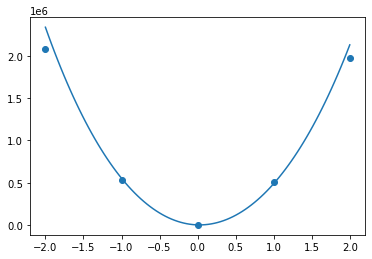

35


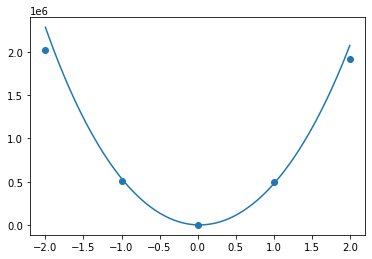

36


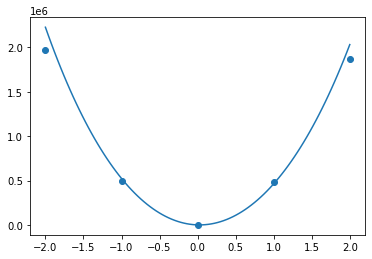

37


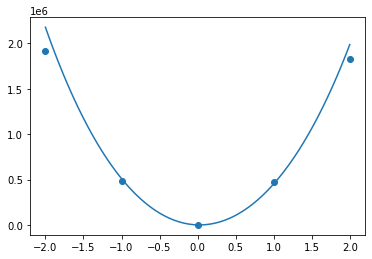

38


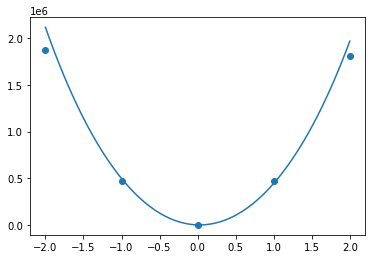

39


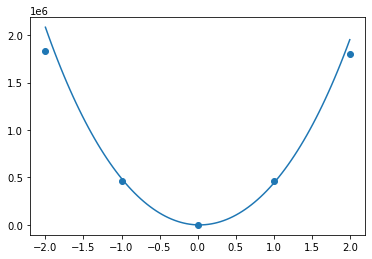

40


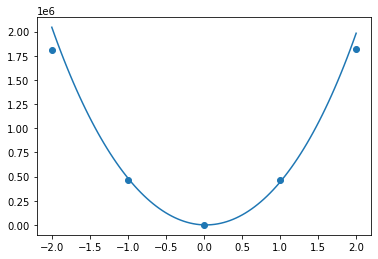

41


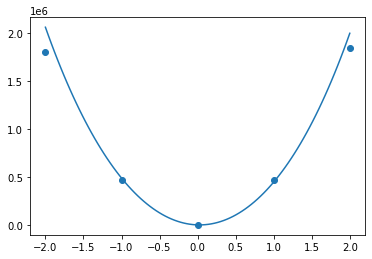

3


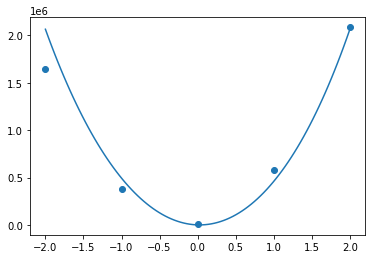

4


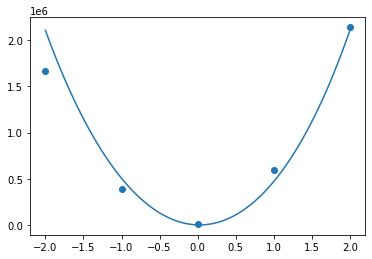

5


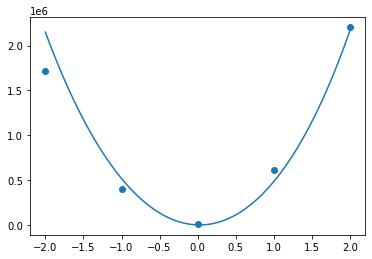

6


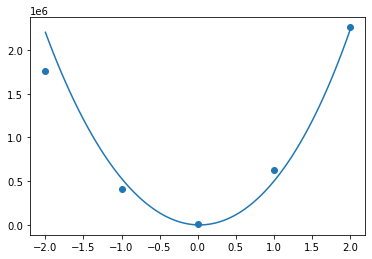

7


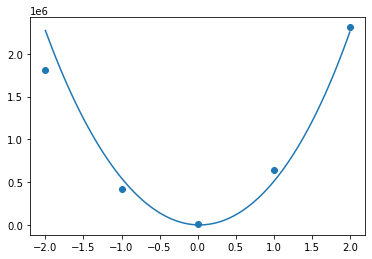

8


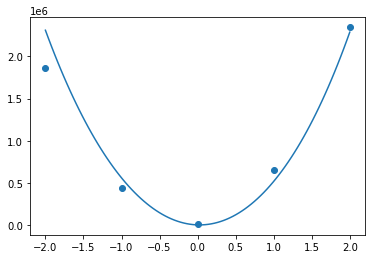

9


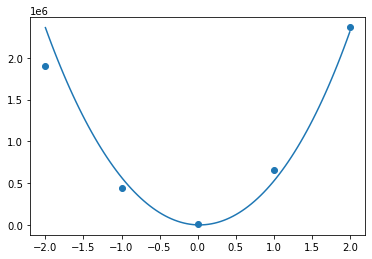

10


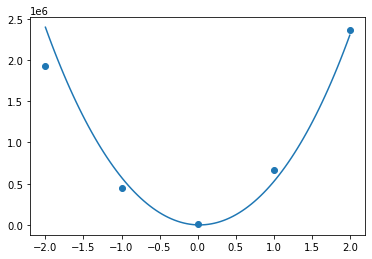

11


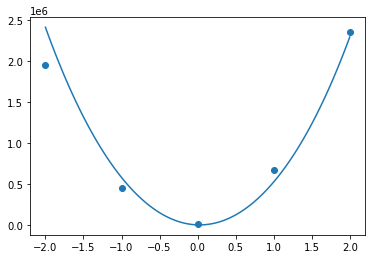

12


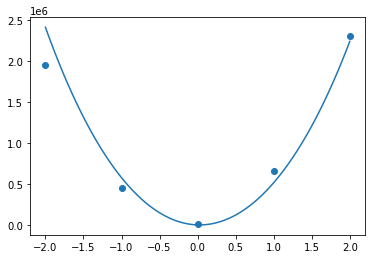

In [25]:
def fitting_function(t, t_n, I_1_squared, I_2_squared, I_1_times_I_2, c):
    return I_1_squared * (t - t_n)**2 + I_2_squared * (t**2 - t_n**2)**2 + 2 * I_1_times_I_2 * (t - t_n) * (t**2 - t_n**2) + c

xs = np.arange(reference_sequence.shape[0])
#for i in range(reference_sequence.shape[0] - 2):
for i in range(30, 50):
    minima = np.argmin(ssds[i][2:-2]) + 2
    print(minima)
    xs = np.linspace(-2, 2, 100)
    plt.plot(xs, fitting_function(xs, 0.025, bc_I_1_squared[minima - 1], bc_I_2_squared[minima - 1], bc_I_1_times_I_2[minima - 1], 0))
    xs = np.linspace(-2, 2, 5)
    plt.scatter(xs, ssds[i][minima - 2:minima + 3])
    plt.show()

## TODO: Correct for drift - easiest to implement this into bog
## TODO: Try doing an average between two curves - for example results close to abs(0.5) should really be using part of neighbouring curve

In [26]:
from scipy.optimize import curve_fit

frame = 10
sfs = []
minimas = []
phases = []
gts = []
for frame in range(sequence.shape[0]):
#for frame in range(0, 100):
    minima = np.argmin(ssds[frame][2:-2]) + 2

    """xs = np.linspace(-2, 2, 100)
    plt.plot(xs, fitting_function(xs, *popt))
    xs = np.linspace(-2, 2, 5)
    plt.scatter(xs, ssds[frame][minima - 2:minima + 3])
    plt.show()"""

    def fitting_function(t, t_n, c, smush):
        I_1_squared = bc_I_1_squared[minima - 1]
        I_2_squared = bc_I_2_squared[minima - 1]
        I_1_times_I_2 = bc_I_1_times_I_2[minima - 1]

        return smush * (I_1_squared * (t - t_n)**2 + I_2_squared * (t**2 - t_n**2)**2 + 2 * I_1_times_I_2 * (t - t_n) * (t**2 - t_n**2) + c)
    xs = np.linspace(-1, 1, 3)
    popt, popc = curve_fit(fitting_function, xs, ssds[frame][minima - 1:minima + 2], p0 = [0, ssds[frame][minima], 1], maxfev = 10000)
    """if popt[0] > 0.5:
        print(minima)
        xs = np.linspace(-2, 2, 100)
        plt.plot(xs, fitting_function(xs, *popt))
        xs = np.linspace(-2, 2, 5)
        plt.scatter(xs, ssds[frame][minima - 2:minima + 3])
        plt.show()
    if popt[0] > 0.5:
        minima += 1
        xs = np.linspace(-1, 1, 3)
        popt, popc = curve_fit(fitting_function, xs, ssds[frame][minima - 1:minima + 2])
        xs = np.linspace(-2, 2, 100)
        plt.plot(xs, fitting_function(xs, *popt))
        xs = np.linspace(-2, 2, 5)
        plt.scatter(xs, ssds[frame][minima - 2:minima + 3])
        plt.show()"""
    """if popt[0] < -0.5:
        minima -= 1
        popt, popc = curve_fit(fitting_function, xs, ssds[frame][minima - 1:minima + 2])"""
    minimas.append(minima - 2)
    sfs.append(popt[0])
    phases.append(minima - 2 + popt[0])

    #print(popt[0])

delta_frames = []
phases = np.array(phases)

reference_period = 3.577851226661945105e+01
reference_period = reference_sequence_period_src

for i in range(1, phases.shape[0]):
    delta_frame = (phases[i] - phases[i - 1]) % reference_period - reference_period
    # Correct for wraparound
    while delta_frame < -reference_period / 2:
        delta_frame += reference_period
    delta_frames.append(delta_frame)

c:\Users\kross\anaconda3\envs\open-optical-gating\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [27]:
sfs = np.array(sfs)
gts = np.where(np.abs(sfs) >= 0.5)

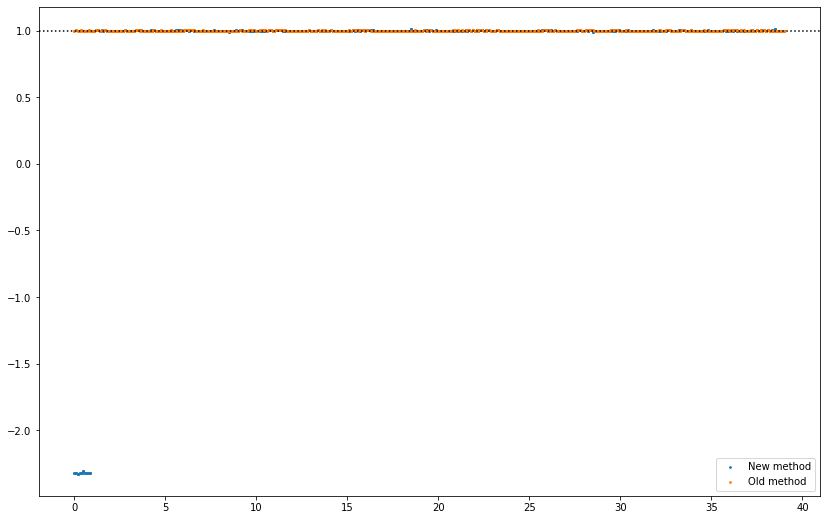

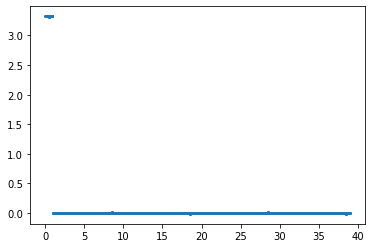

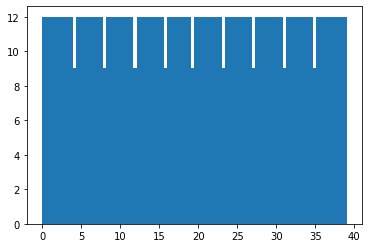

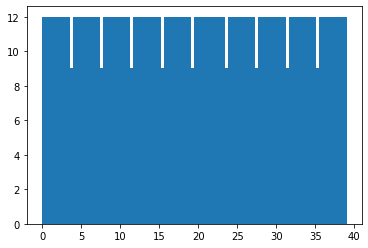

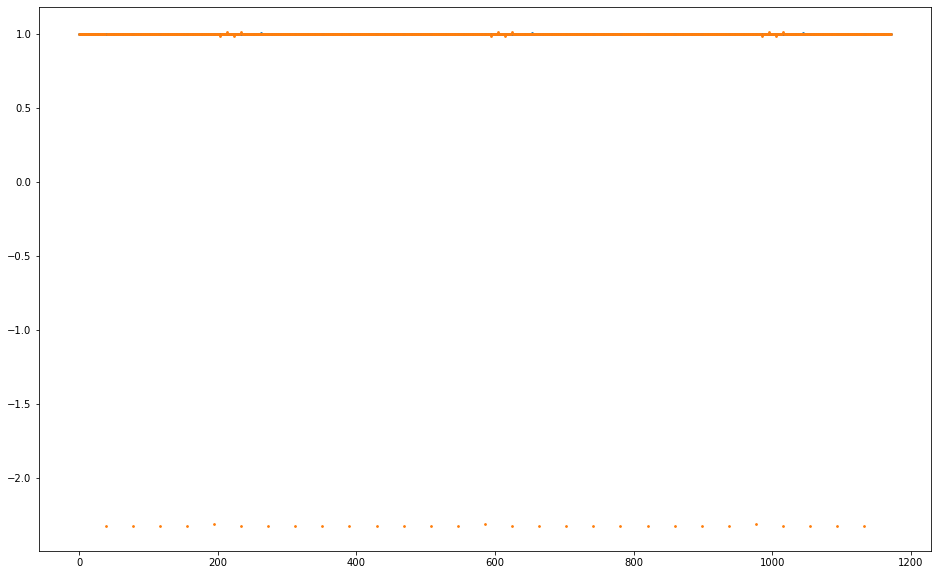

In [31]:
delta_frames = np.array(delta_frames)
phases = np.array(phases)

plt.figure(figsize = (14, 9))
plt.scatter(phases[1::], delta_frames, s = 3, label = "New method")
# Bit of a hack but hide outliers where we've picked the wrong 3 minima by covering them
#plt.scatter(phases[1::][gts], delta_frames[gts], s = 4, alpha = 1, c = "red")
#plt.scatter(phases[1::][gts[0] + 1], delta_frames[gts[0] + 1], s = 4, alpha = 1, c = "red")
plt.scatter(og.phases[1::], og.delta_phases, s = 3, label = "Old method")
#plt.scatter(og.phases[10:45], og.delta_phases[10:45], c = "black")
#plt.scatter(phases[10:46], delta_frames[10:46], c = "black")
plt.axhline(1, ls = ":", c = "black")
plt.legend()
plt.show()

plt.scatter(phases[1::], og.delta_phases - delta_frames, s = 3)
plt.show()

plt.hist(phases, bins = 100)
plt.show()

plt.hist(og.phases, bins = 100)
plt.show()

plt.figure(figsize = (16,10))
plt.scatter(range(og.delta_phases.shape[0]), og.delta_phases, s = 3)
plt.scatter(range(og.delta_phases.shape[0]), delta_frames, s = 3)
plt.show()

0.4595055413469736


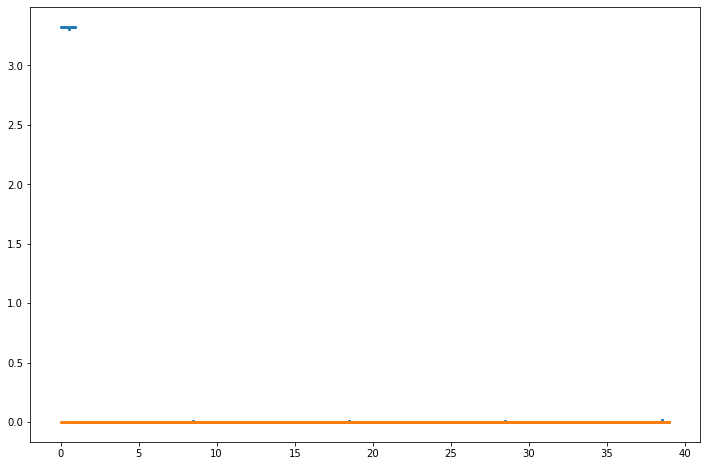

In [29]:
plt.figure(figsize = (12, 8))
plt.scatter(phases[1::], np.abs(delta_frames - 1), s = 3)
plt.scatter(og.phases[1::], np.abs(og.delta_phases - 1), s = 3)


print(np.count_nonzero(np.abs(delta_frames - 1) > np.abs(og.delta_phases - 1)) / (og.sequence.shape[0]))

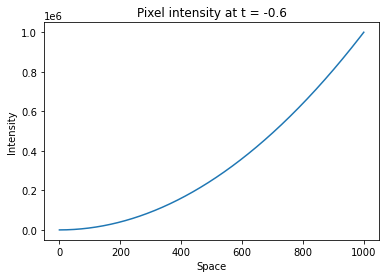

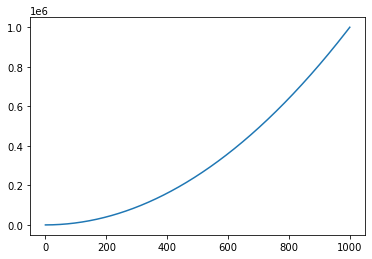

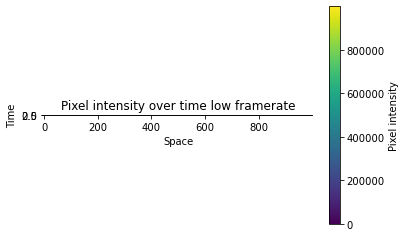

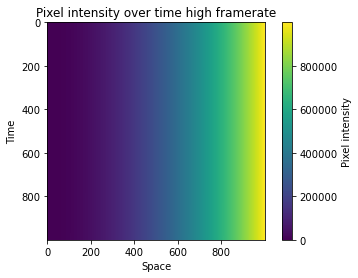

In [32]:
def intensity_function(x,t):
    I_0 = x
    I_1 = x#+ 10 * np.sin(x)#8 * np.sin(x / 16)
    I_2 = x# + 10 * np.cos(x)#8 * np.cos(x / 16)
    return I_0 + I_1**2 + I_0 * t**2#I_0 + I_1 * t + I_2 * t**2

xs = np.arange(1000)

ts_hf = np.linspace(-1,1,1000)
reference_frames_hf = []
for t in ts_hf:
    reference_frames_hf.append(intensity_function(xs, t))
reference_frames_hf = np.array(reference_frames_hf)

ts_lf = np.linspace(-1,1,3)
reference_frames_lf = []
for t in ts_lf:
    reference_frames_lf.append(intensity_function(xs, t))# + np.random.normal(0, 0.1, 50)[0])
reference_frames_lf = np.array(reference_frames_lf)

t_n = -0.6
frame = intensity_function(xs, t_n)

plt.title(f"Pixel intensity at t = {t_n}")
plt.plot(frame)
plt.xlabel("Space")
plt.ylabel("Intensity")
plt.show()

plt.plot(reference_frames_hf[0,:])
plt.show()

plt.title("Pixel intensity over time low framerate")
plt.imshow(reference_frames_lf)
plt.ylabel("Time")
plt.xlabel("Space")
plt.colorbar(label = "Pixel intensity")
plt.show()

plt.title("Pixel intensity over time high framerate")
plt.imshow(reference_frames_hf)
plt.ylabel("Time")
plt.xlabel("Space")
plt.colorbar(label = "Pixel intensity")
plt.show()

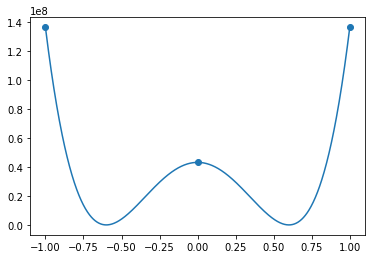

In [ ]:
ssds_hf = []
for reference_frame in reference_frames_hf:
    ssd = np.sum((frame - reference_frame)**2)
    ssds_hf.append(ssd)

ssds_lf = []
for reference_frame in reference_frames_lf:
    ssd = np.sum((frame - reference_frame)**2)
    ssds_lf.append(ssd)

plt.plot(ts_hf, ssds_hf)
plt.scatter(ts_lf, ssds_lf)
plt.show()

(3, 1000)
[0. 0. 0.]
83208375.0
83208375.0
-83208375.0
[-1.  0.  1.]


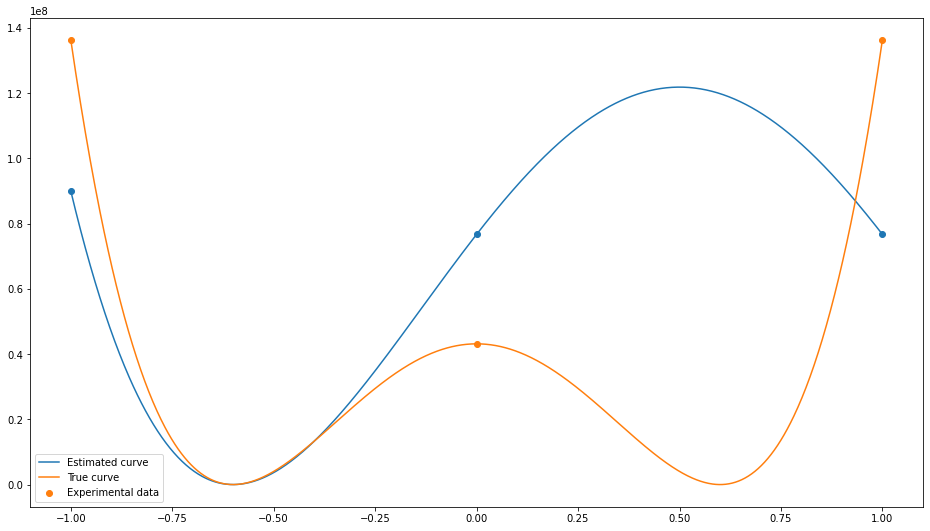

In [ ]:
print(reference_frames_lf.shape)
print(reference_frames_lf[:,0])
for i in range(len(reference_frames_lf)):
    y_2 = reference_frames_lf[0]
    y_1 = reference_frames_lf[1]
    y_3 = reference_frames_lf[2]

    I_0 = y_2
    I_2 = (y_1 + y_3 - 2 * y_2) / 2
    I_1 = y_3 - I_2 - I_0

    I_1_squared = np.sum(I_1**2)
    I_2_squared = np.sum(I_2**2)
    I_1_times_I_2 = np.sum(I_1 * I_2)

print(I_1_squared)
print(I_2_squared)
print(I_1_times_I_2)

def fitting_function(t, t_n):
    return I_1_squared * (t - t_n)**2 + I_2_squared * (t**2 - t_n**2)**2 + 2 * I_1_times_I_2 * (t - t_n) * (t**2 - t_n**2)


print(ts_lf)
plt.figure(figsize = (16,9))
plt.plot(ts_hf, fitting_function(ts_hf, t_n), label = "Estimated curve")
plt.scatter(ts_lf, fitting_function(ts_lf, t_n))
plt.plot(ts_hf, ssds_hf, label = "True curve")
plt.scatter(ts_lf, ssds_lf, label = "Experimental data")
#plt.xlim(0.45, 0.55)
#plt.ylim(-5, 30)
plt.legend()
plt.show()